<a href="https://colab.research.google.com/github/SanePai/SSA/blob/main/Sliding_SSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy import pi
import pandas as pd
import random
from numpy import linalg
import matplotlib.pyplot as plt
import math
from sklearn.cluster import AgglomerativeClustering as ac
import scipy.cluster.hierarchy as sch

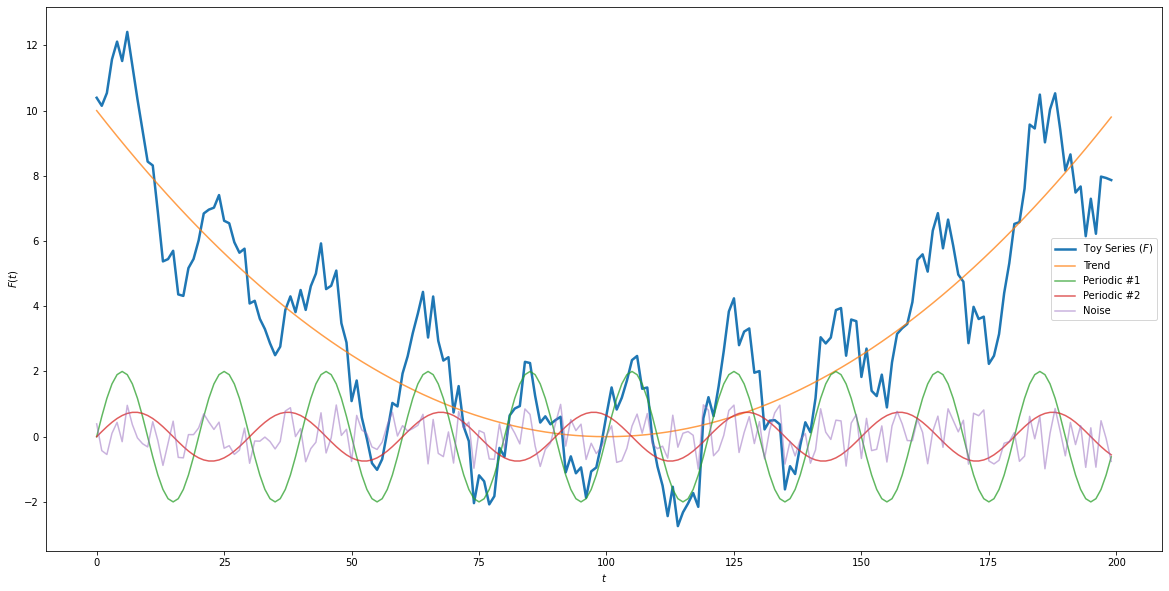

array([10.39293837, 10.14724643, 10.53832589, 11.57050247, 12.11440959,
       11.52073197, 12.41293382, 11.38258489, 10.34732573,  9.39656141,
        8.43587509,  8.31842405,  6.88641292,  5.37537429,  5.44590925,
        5.70099081,  4.36293666,  4.31681704,  5.1706933 ,  5.44926257,
        6.01928286,  6.84460519,  6.96258973,  7.02318959,  7.40970741,
        6.62139877,  6.54433172,  5.96272151,  5.64194612,  5.76505247,
        4.08420988,  4.16630212,  3.6152075 ,  3.29917515,  2.86290617,
        2.4990415 ,  2.75988197,  3.88363576,  4.30264095,  3.81993175,
        4.49742496,  3.8876294 ,  4.61498041,  5.00173889,  5.92666512,
        4.52591073,  4.62824779,  5.09310108,  3.4777018 ,  2.88746442,
        1.09173828,  1.72235523,  0.58865833, -0.0647894 , -0.81387775,
       -1.01627747, -0.68942723,  0.1527286 ,  1.0342907 ,  0.92787692,
        1.93862757,  2.46684086,  3.17442999,  3.77725103,  4.44015653,
        3.04090903,  4.2987711 ,  2.94025816,  2.33390785,  2.43

In [ ]:
N = 200 # The number of time 'moments' in our toy series
t = np.arange(0,N)
trend = 0.001 * (t - 100)**2
p1, p2 = 20, 30
periodic1 = 2 * np.sin(2*pi*t/p1)
periodic2 = 0.75 * np.sin(2*pi*t/p2)

np.random.seed(123) # So we generate the same noisy time series every time.
noise = 2 * (np.random.rand(N) - 0.5)
F = trend + periodic1 + periodic2 + noise

# Plot everything
plt.figure(figsize = (20,10))
plt.plot(t, F, lw=2.5)
plt.plot(t, trend, alpha=0.75)
plt.plot(t, periodic1, alpha=0.75)
plt.plot(t, periodic2, alpha=0.75)
plt.plot(t, noise, alpha=0.5)
plt.legend(["Toy Series ($F$)", "Trend", "Periodic #1", "Periodic #2", "Noise"])
plt.xlabel("$t$")
plt.ylabel("$F(t)$")
plt.show()

ts = F
ts

In [ ]:
def build_traj(ts,L):
    N = len(ts)
    #L = Window Length
    K = N-L+1 #Number of columns in the trajectory matrix
    print(f'Realization length(N):\t{N}\nWindow Length(L):\t{L}\nK:\t\t\t{K}')
    X = np.column_stack([ts[i:i+L] for i in range(K)])
    print(f"Trajectory Matrix:\n{X}")
    return X

def SVD(X):
    d = np.linalg.matrix_rank(X)
    U,s,vh = np.linalg.svd(X)
    E = np.diag(s)
    V = np.transpose(vh)
    return d, U, s, vh, E, V

def diag_avg(X):
    X_rev = np.fliplr(X)
    m,n = np.shape(X)
    x = np.array([X_rev.diagonal(i).mean() for i in range(-m+1, n)])
    return x[::-1]

def autoSSA(ts,r,L):
    '''
    s = data
    r = number of components to extract
    L = embedding dimension
    '''
    #Trajectory Matrix
    X = build_traj(ts, L)
    #SVD
    d, U, s, vh, E, V = SVD(X)
    X_elem = np.array( [s[i] * np.outer(U[:,i], V[:,i]) for i in range(0,d)] )
    xts = []
    for i in range(L):
        xts.append(diag_avg(X_elem[i]))
    xts = np.array(xts)
    #HCA
    dendrogram = sch.dendrogram(sch.linkage(xts, method='ward'))
    model = ac(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
    model.fit(xts)
    labels = model.labels_
    #separate elements
    f = []
    for i in range(r):
        f.append(xts[labels == i])
    x = []
    for i in range(r):
        x_ = 0
        for i in f[i]:
           x_ += i
        x.append(x_)
    plt.figure(figsize=(20,10))
    styles = ['r', 'b', 'g', 'y', 'r+']
    for i in range(r):
        plt.plot(x[i], styles[i], label = f'x{i}')
        plt.legend()
    plt.show()
    return x

In [ ]:
def sliding_ssa()